# Movie Rating Prediction

Movie Rating Prediction is a data science project that uses machine learning to forecast how well a movie is likely to be rated by viewers.

It leverages various movie attributes and features to provide insights for filmmakers, studios, and viewers, helping them make informed decisions about movie success and preferences.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [4]:
df_movies = pd.read_csv(r"movies.dat", sep='::', engine='python', encoding='latin1',names = ['MovieID','Title','Genre'])
df_ratings = pd.read_csv(r"/content/ratings.dat",sep='::', engine='python',encoding='latin1')
df_ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
df_users = pd.read_csv(r"users.dat",sep='::',engine='python',encoding='latin1')
df_users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [5]:
df_movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3.0,978302109.0
1,1,914,3.0,978301968.0
2,1,3408,4.0,978300275.0
3,1,2355,5.0,978824291.0
4,1,1197,3.0,978302268.0


In [7]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


# Data Preprocessing

In [8]:
df_movies.shape

(3883, 3)

In [9]:
df_movies.value_counts()

MovieID  Title                                    Genre                        
1        Toy Story (1995)                         Animation|Children's|Comedy      1
2677     Buena Vista Social Club (1999)           Documentary                      1
2649     Son of Frankenstein (1939)               Horror                           1
2650     Ghost of Frankenstein, The (1942)        Horror                           1
2651     Frankenstein Meets the Wolf Man (1943)   Horror                           1
                                                                                  ..
1319     Kids of Survival (1993)                  Documentary                      1
1320     Alien³ (1992)                            Action|Horror|Sci-Fi|Thriller    1
1321     American Werewolf in London, An (1981)   Horror                           1
1322     Amityville 1992: It's About Time (1992)  Horror                           1
3952     Contender, The (2000)                    Drama|Thriller      

In [10]:
df_ratings.shape

(260830, 4)

In [11]:
df_users.shape

(6039, 5)

In [12]:
df_movies.isna().sum()

MovieID    0
Title      0
Genre      0
dtype: int64

In [13]:
df_ratings.isna().sum()

UserID       0
MovieID      0
Rating       1
Timestamp    1
dtype: int64

In [14]:
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_users['Gender']= labelencoder.fit_transform(df_users['Gender'])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [16]:
#Concatenating the datasets for combining the 3 datasets of movies,users and rating
df_m=pd.concat([df_movies,df_ratings,df_users],axis=1)
df_m.head()


,MovieID,Title,Genre,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,661,3.0,978302109.0,2.0,1.0,56.0,16.0,70072
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,914,3.0,978301968.0,3.0,1.0,25.0,15.0,55117
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,3408,4.0,978300275.0,4.0,1.0,45.0,7.0,02460
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,2355,5.0,978824291.0,5.0,1.0,25.0,20.0,55455
4,5.0,Father of the Bride Part II (1995),Comedy,1,1197,3.0,978302268.0,6.0,0.0,50.0,9.0,55117


In [17]:
df_m.shape

(260830, 12)

In [18]:
df_m.isna().sum()

MovieID       256947
Title         256947
Genre         256947
UserID             0
MovieID            0
Rating             1
Timestamp          1
UserID        254791
Gender        254791
Age           254791
Occupation    254791
Zip-code      254791
dtype: int64

In [19]:
df_m.value_counts

<bound method DataFrame.value_counts of         MovieID                               Title  \
0           1.0                    Toy Story (1995)   
1           2.0                      Jumanji (1995)   
2           3.0             Grumpier Old Men (1995)   
3           4.0            Waiting to Exhale (1995)   
4           5.0  Father of the Bride Part II (1995)   
...         ...                                 ...   
260825      NaN                                 NaN   
260826      NaN                                 NaN   
260827      NaN                                 NaN   
260828      NaN                                 NaN   
260829      NaN                                 NaN   

                               Genre  UserID  MovieID  Rating    Timestamp  \
0        Animation|Children's|Comedy       1      661     3.0  978302109.0   
1       Adventure|Children's|Fantasy       1      914     3.0  978301968.0   
2                     Comedy|Romance       1     3408     4.0  97

In [20]:
# Droping unwanted columns
df_d=df_m.drop(["Occupation","Zip-code","Timestamp"],axis=1)

In [21]:
df_d.head()

,MovieID,Title,Genre,UserID,MovieID,Rating,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,661,3.0,2.0,1.0,56.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,914,3.0,3.0,1.0,25.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,3408,4.0,4.0,1.0,45.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,2355,5.0,5.0,1.0,25.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,1197,3.0,6.0,0.0,50.0


In [22]:
# Handling missing values
df_final=df_d.dropna()

In [23]:
df_final.shape

(3883, 9)

In [24]:
df_final.dtypes

MovieID    float64
Title       object
Genre       object
UserID       int64
MovieID      int64
Rating     float64
UserID     float64
Gender     float64
Age        float64
dtype: object

# Data Visualization

<ipython-input-25-f984c03c77bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr())


<Axes: >

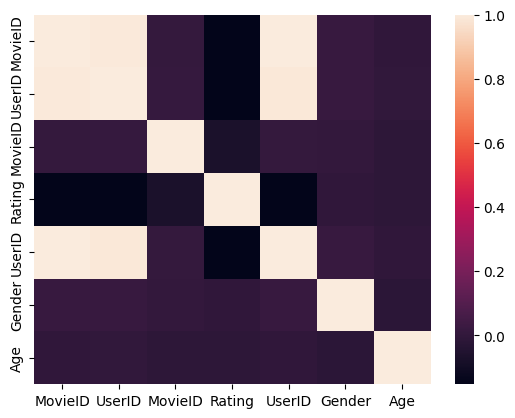

In [25]:
sns.heatmap(df_final.corr())

Text(0.5, 0, 'Ratings')

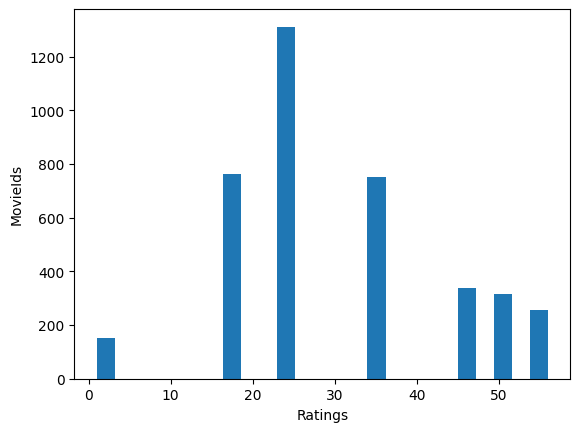

In [26]:
df_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

<Axes: >

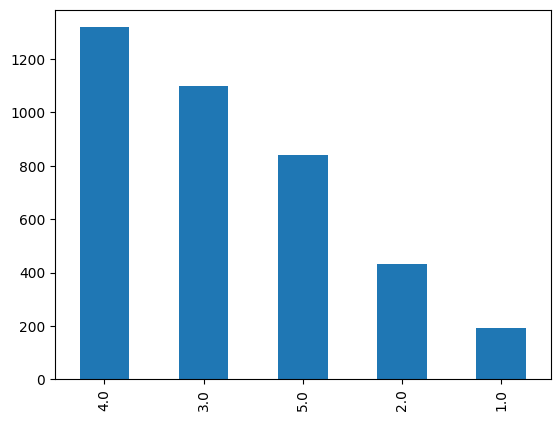

In [27]:
df_final['Rating'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='count'>

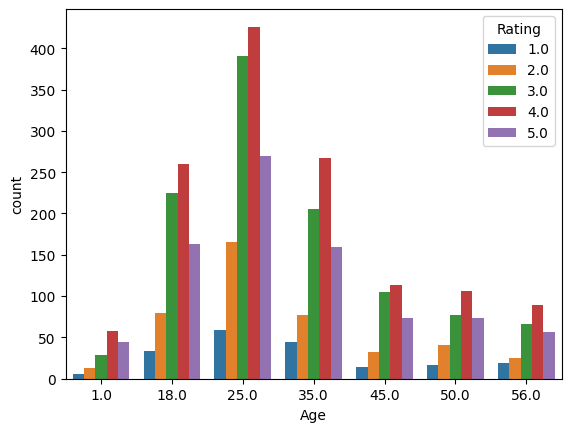

In [28]:
sns.countplot(x=df_final['Age'],hue=df_final['Rating'])

# Observation:



1.   User of age 24 are the highest viewers and the most frequently given rating to a movie is a 4 star.
2.   Users of age 25 give out most ratings



# Machine Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Use the following features:movie id,age,occupation
features=df_final[['MovieID','Age','Gender']].values

#Use rating as label
labels=df_final[['Rating']].values

In [31]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

# Machine Learning Models

In [32]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


33.45

In [33]:
#K Nearest Neighbour Classification
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


60.05

In [34]:
#Decision Tress
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0